# Mega Case Study - Making a hybrid Deep Learning Model

# Part 1 - SOM

## Install MiniSom Package

In [1]:
!pip install MiniSom

## Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [6]:
df = pd.read_csv('Credit_Card_Applications.csv')

x = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values

In [7]:
df

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


## Feature Scaling


In [8]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))
x = sc.fit_transform(x)

In [9]:
x

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

## Training the SOM


In [10]:
from minisom import MiniSom

som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(x)
som.train_random(data = x, num_iteration = 100)

## Visualizing the results


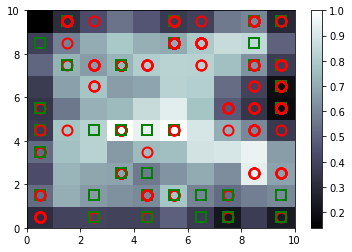

In [11]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x_vector in enumerate(x):
    w = som.winner(x_vector)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [12]:
mappings = som.win_map(x)
frauds = np.concatenate((mappings[(3,4)], mappings[(5,4)]), axis = 0)
frauds = sc.inverse_transform(frauds)

## Printing the Fraunch Clients

In [13]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15786237
15766183
15590434
15767358
15808662
15684722
15567839
15671014
15772329
15734649
15579583
15642336
15740487
15593345
15646082
15811742
15717629
15757188
15635598
15647191
15702571
15622083
15646190
15776545
15715907
15792107
15768342
15748532
15689692
15793896
15813192
15672357
15788634
15753591
15682540
15797246
15800773
15571081
15715519
15630592
15636562
15757306
15711759
15665181


# Part 2 - Going from Unsupervised to Supervised Deep Learning 

## Create Matrix of Features

In [15]:
costumers = df.iloc[:, 1:].values

## Create Dependent Variable

In [22]:
is_fraud = np.zeros(len(df))

In [23]:
for i in range(0, len(df)):
    if df.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [31]:
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Part 3 - ANN

### Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
costumers = sc.fit_transform(costumers)

## Building the ANN

## Initializing the ANN

In [39]:
from tensorflow.keras.models import Sequential

ann = Sequential()

## Adding the input layer and the first hidden layer

In [40]:
from tensorflow.keras.layers import Dense

ann.add(Dense(units = 2, activation = 'relu', kernel_initializer = 'uniform', input_dim = 15)) #input_dim = 15: since we have "15" features (columns).

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Adding the output layer

In [41]:
ann.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform'))

## Training the ANN

## Compiling the ANN

In [42]:
ann.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Training the ANN on the Training set

In [43]:
ann.fit(costumers, is_fraud, batch_size = 1, epochs = 2) #batch_size = 1: foe simplicity

Train on 690 samples
Epoch 1/2
690/690 [==============================] - 1s 1ms/sample - loss: 0.5105 - acc: 0.9333
Epoch 2/2
690/690 [==============================] - 1s 1ms/sample - loss: 0.2832 - acc: 0.9362


In [44]:
#So the accuracy is about 93%.

## Predicting test set results

In [70]:
y_Pred = ann.predict(costumers)

In [71]:
y_Pred

array([[0.02414218],
       [0.05177653],
       [0.02886331],
       [0.27551308],
       [0.32726932],
       [0.31338346],
       [0.01738873],
       [0.32907563],
       [0.02849811],
       [0.32907563],
       [0.31969497],
       [0.32907563],
       [0.12802869],
       [0.32907563],
       [0.03367978],
       [0.06002545],
       [0.31398594],
       [0.3132468 ],
       [0.01214698],
       [0.32907563],
       [0.03918171],
       [0.10318068],
       [0.01767471],
       [0.08698624],
       [0.02586421],
       [0.30418947],
       [0.0120115 ],
       [0.27228594],
       [0.32907563],
       [0.22404966],
       [0.2688305 ],
       [0.07301748],
       [0.32500607],
       [0.32907563],
       [0.14623368],
       [0.03802183],
       [0.21571785],
       [0.32907563],
       [0.32907563],
       [0.32907563],
       [0.19614708],
       [0.01170251],
       [0.29968858],
       [0.14210075],
       [0.01856175],
       [0.28898585],
       [0.03428736],
       [0.037

In [72]:
y_Pred = np.concatenate((df.iloc[:, 0:1].values, y_Pred), axis = 1) #df.iloc[:, 0:1] instead of df.iloc[:, 0]: will do the task of ".reshape(len(df.iloc[:, 0].values), 1)"!"

In [73]:
y_Pred

array([[1.57761560e+07, 2.41421759e-02],
       [1.57395480e+07, 5.17765284e-02],
       [1.56628540e+07, 2.88633108e-02],
       ...,
       [1.56754500e+07, 3.27669442e-01],
       [1.57764940e+07, 3.29075605e-01],
       [1.55924120e+07, 6.18377179e-02]])

In [74]:
y_Pred = y_Pred[y_Pred[:, 1].argsort()] #sort by only one column!    #y_Pred[:, 1].argsort(): returns the indexes of the sorted elements, in order.

In [75]:
y_Pred #So this is the sorted client IDs in the left, and their probabilty of being fraudulent (according to the ANN model prediction) in the right!

array([[1.56430560e+07, 6.54116273e-03],
       [1.56009750e+07, 7.44652748e-03],
       [1.57092520e+07, 9.03499126e-03],
       ...,
       [1.57778930e+07, 3.29075634e-01],
       [1.58116900e+07, 3.29075634e-01],
       [1.57666630e+07, 3.29075634e-01]])